## Heart Disease
Data blev taget fra [Kaggle](https://www.kaggle.com/fedesoriano/heart-failure-prediction).

Nødvendige pakker hentes

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Preprocessing import normalize_dataframe
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA

from Preprocessing import normalize_dataframe

Data loades fra csv fil:

In [9]:
data = pd.read_csv("Data/heart.csv", delimiter=';')

Vi har 918 observationer med 12 variabler. Her er summary af vores data.

In [10]:
print(data.head())
print(data.info())
print(data.describe())

numerical= data.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
categorical = data.select_dtypes('object').columns

print(f'Numerical Columns:  {data[numerical].columns}')
print('\n')
print(f'Categorical Columns: {data[categorical].columns}')
data[categorical].nunique()

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N        0       Up             0  
1              N        1     Flat             1  
2              N        0       Up             0  
3              Y       15     Flat             1  
4              N        0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age      

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

#### Histogram


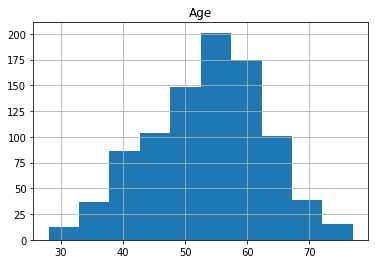

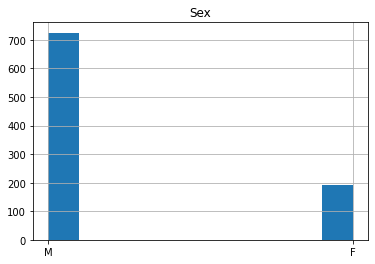

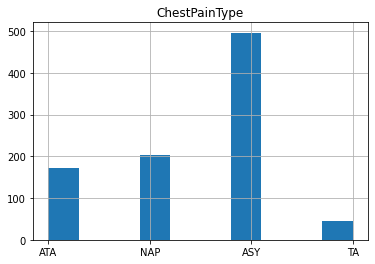

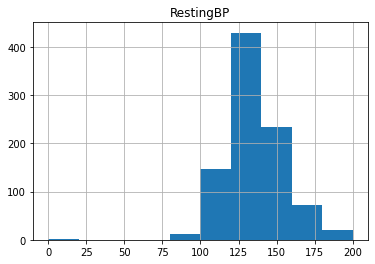

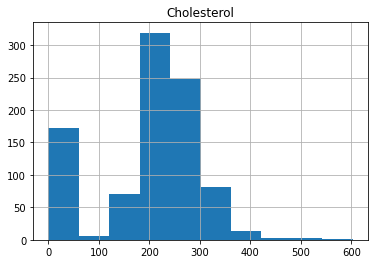

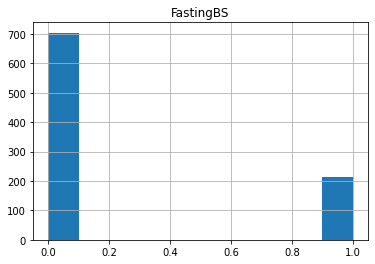

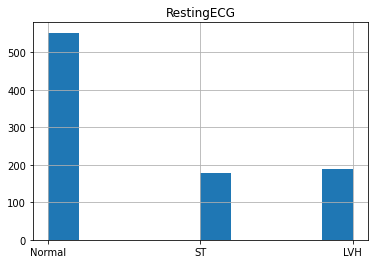

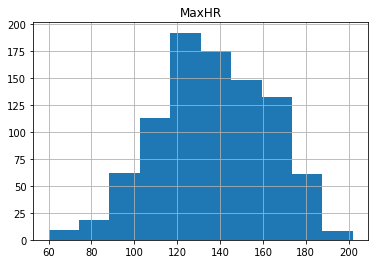

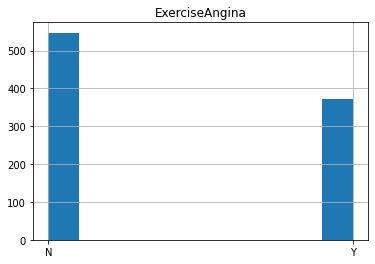

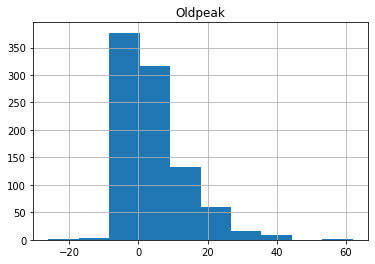

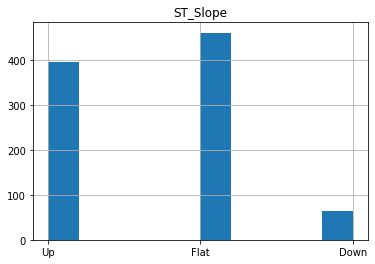

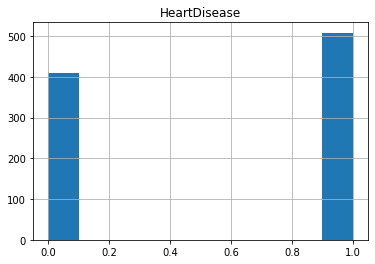

In [11]:
data = pd.read_csv("Data/heart.csv", delimiter=';')
for i in range(0, 12):
    data[data.columns[i]].hist()
    plt.title(data.columns[i])
    plt.savefig(data.columns[i] + ".png" )
    plt.show()

PCA values from numerical data
[[ 0.61359995  0.41880438  0.13023136 -0.51035224  0.4131324 ]
 [-0.08348305  0.33683955  0.88301533  0.21082844 -0.23538266]]
new Data set containing two attributes after transforming
         pca1      pca2
0   -1.483569  1.331276
1   -0.278299 -0.149212
2   -0.392796  0.436996
3    0.851357 -0.846694
4    0.496011 -0.429802
..        ...       ...
741 -0.550220 -0.333572
742  2.441767 -1.440551
743  0.769988 -2.180666
744 -0.786858  0.213113
745 -1.932924 -0.383280

[746 rows x 2 columns]


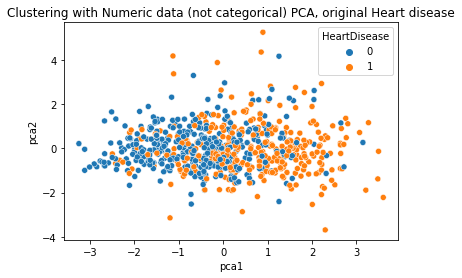

In [12]:
# read the one out of k file

dataframe_oneOutOfK = pd.read_csv("Data/feature_transform_outliers_removed.csv", delimiter=",").copy()

## read heart disease attribute from original data.
heartdisease = dataframe_oneOutOfK["HeartDisease"].copy()


# normalize the data
normalizeDataFrame = normalize_dataframe(df=dataframe_oneOutOfK).copy()


# remove Heart disease column
del normalizeDataFrame["HeartDisease"]

## PCA part original heart disease attribute

NumericData = normalizeDataFrame.copy().loc[:,'Age':'Oldpeak']
reducedData_numeric = PCA(n_components=2).fit(NumericData)

print("PCA values from numerical data")
print(reducedData_numeric.components_)
transformed_numeric = reducedData_numeric.transform(NumericData)

result = pd.DataFrame(transformed_numeric, columns=['pca1', 'pca2'])
print("new Data set containing two attributes after transforming")
print(result)


##scater plot numeric PCA
sns.scatterplot(data=result,x="pca1",y="pca2",hue=heartdisease)
plt.title('Clustering with Numeric data (not categorical) PCA, original Heart disease')
plt.show()


Total antal syge: 356
total observationer i klynge 1(orange): 357
total hjertesyge observationer i klynge 1(orange): 249
total observationer i klynge 2(grøn+rød): 389
total hjertesyge observationer i klynge 2(grøn+rød): 107


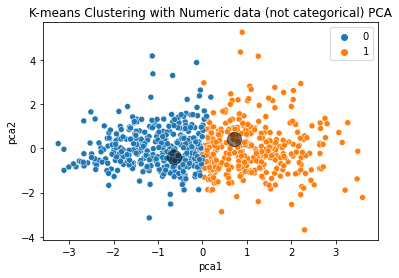

In [13]:
## PCA part predict values with KMEANS

NumericData_p = normalizeDataFrame.copy().loc[:,'Age':'Oldpeak']
reducedData_numeric_p = PCA(n_components=2).fit_transform(NumericData_p)


result = pd.DataFrame(reducedData_numeric_p, columns=['pca1', 'pca2'])
numeric_kmeans = KMeans(n_clusters=2, init='k-means++', random_state=999)
y_numeric_predict = numeric_kmeans.fit_predict(NumericData_p)
y_numeric_centers = numeric_kmeans.cluster_centers_


syg_total = 0

for i in range(746):
    if dataframe_oneOutOfK["HeartDisease"][i] == 1:
        syg_total = syg_total + 1
print(f"Total antal syge: {syg_total}")

klynge1_total = 0
klynge1_syg = 0
klynge2_total = 0
klynge2_syg = 0
for i in range(746):
    if y_numeric_predict[i] == 1:
        klynge1_total = klynge1_total + 1
        if dataframe_oneOutOfK["HeartDisease"][i] == 1:
            klynge1_syg = klynge1_syg + 1
    else:
        klynge2_total = klynge2_total + 1
        if dataframe_oneOutOfK["HeartDisease"][i] == 1:
            klynge2_syg = klynge2_syg + 1
print(f"total observationer i klynge 1(orange): {klynge1_total}")
print(f"total hjertesyge observationer i klynge 1(orange): {klynge1_syg}")
print(f"total observationer i klynge 2(grøn+rød): {klynge2_total}")
print(f"total hjertesyge observationer i klynge 2(grøn+rød): {klynge2_syg}")




##scater plot numeric PCA
sns.scatterplot(data=result,x="pca1",y="pca2",hue=y_numeric_predict)
plt.scatter(y_numeric_centers[:, 0], y_numeric_centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering with Numeric data (not categorical) PCA')
plt.show()


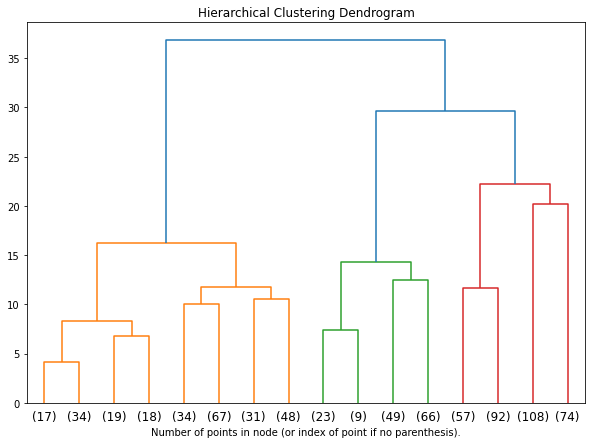

In [14]:
from Preprocessing import normalize_dataframe

dataframe_oneOutOfK = pd.read_csv("Data/feature_transform_outliers_removed.csv", delimiter=",").copy()
normalizeDataFrame = normalize_dataframe(df=dataframe_oneOutOfK).copy()
del normalizeDataFrame["HeartDisease"]
NumericData = normalizeDataFrame.copy().loc[:,'Age':'Oldpeak']
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(affinity='euclidean',linkage='ward',distance_threshold=0, n_clusters=None)
model = model.fit(NumericData)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig("Hierarchical_Clustering_feature.png" )
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
output = cluster.fit_predict(NumericData)

In [16]:
data = pd.read_csv("Data/feature_transform_outliers_removed.csv", delimiter=",").copy()

syg_total = 0

for i in range(746):
    if data["HeartDisease"][i] == 1:
        syg_total = syg_total + 1
print(f"Total antal syge: {syg_total}")

klynge1_total = 0
klynge1_syg = 0
klynge2_total = 0
klynge2_syg = 0
for i in range(746):
    if output[i] == 1:
        klynge1_total = klynge1_total + 1
        if data["HeartDisease"][i] == 1:
            klynge1_syg = klynge1_syg + 1
    else:
        klynge2_total = klynge2_total + 1
        if data["HeartDisease"][i] == 1:
            klynge2_syg = klynge2_syg + 1
print(f"total observationer i klynge 1(orange): {klynge1_total}")
print(f"total hjertesyge observationer i klynge 1(orange): {klynge1_syg}")
print(f"total observationer i klynge 2(grøn+rød): {klynge2_total}")
print(f"total hjertesyge observationer i klynge 2(grøn+rød): {klynge2_syg}")

Total antal syge: 356
total observationer i klynge 1(orange): 268
total hjertesyge observationer i klynge 1(orange): 60
total observationer i klynge 2(grøn+rød): 478
total hjertesyge observationer i klynge 2(grøn+rød): 296


In [17]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import tree
import graphviz
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from Utilities import CustomDataset, NN, accuracy

test_percent = 0.2

# Hyper parameters NN
batch_size = 128
learning_rate = 1.5e-4
weight_decay = 1e-4
num_epochs = 160
dropout_percentage = 0.5
num_hidden_units = 20

# Hyper parameters for random forest
max_depth = 4

# Load and shuffle data (with same seed as for validation)
data = pd.read_csv("Data/one_out_of_k_outliers_removed.csv", delimiter=',')
data = data.sample(frac=1, random_state=3895).reset_index(drop=True)  # shuffle rows to produce randoms sets

# Split data into inputs and targets
targets = torch.tensor(
    data["HeartDisease"]
).type(torch.FloatTensor)
inputs = torch.tensor(
    data.drop("HeartDisease", axis=1).values
).type(torch.FloatTensor)
labels = data.drop("HeartDisease", axis=1).columns.tolist()

# Assert everything is as expected
assert len(targets) == inputs.shape[0]
assert len(labels) == inputs.shape[1]

# Split inputs and targets into train and test
split_index = int(len(targets) * test_percent)
X_train = inputs[split_index:]
y_train = targets[split_index:]
X_test = inputs[0:split_index]
y_test = targets[0:split_index]

# Normalize the data
train_means = torch.mean(X_train, axis=0)
train_stds = torch.std(X_train, axis=0)
X_train = (X_train - train_means) / train_stds
X_test = (X_test - train_means) / train_stds

# Train random forest
model = RandomForestClassifier(max_depth=max_depth)
model.fit(X_train, y_train)

# Test model
train_accuracy_RF = accuracy(model.predict(X_train), y_train.numpy())
test_accuracy_RF = accuracy(model.predict(X_test), y_test.numpy())

# Save a random tree from the forest
estimator = model.estimators_[0]

dot_data = tree.export_graphviz(
    estimator,
    out_file=None,
    feature_names=labels,
    class_names=["Negative", "Positive"],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("rf")

# Wrap training data in dataloader
DS_train = CustomDataset(X_train, y_train)
DL_train = DataLoader(DS_train, batch_size=batch_size, shuffle=True)

# Define net
net = NN(num_hidden_units, dropout_percentage)
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Train the network
train_losses, test_losses, train_accuracies, test_accuracies, eval_counter = [], [], [], [], []
test_output, train_output = None, None

In [18]:
for epoch in range(num_epochs):
    for index, data in enumerate(DL_train, 0):
        input = data[0]
        target = data[1]

        net.train()
        optimizer.zero_grad()
        output = torch.squeeze(net(input))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    # Evaluate every x epochs
    if epoch % 1 == 0:
        net.eval()
        eval_counter.append(epoch)

        # Evaluate on training data
        train_output = torch.squeeze(net(X_train))
        train_losses.append(
            criterion(train_output, y_train).detach().numpy()
        )
        train_accuracies.append(
            accuracy(
                [1 if x[0] > 0.5 else 0 for x in net(X_train).detach().numpy()],
                y_train.numpy()
            )
        )

        # Evaluate on test data
        test_output = torch.squeeze(net(X_test))
        test_losses.append(
            criterion(test_output, y_test).detach().numpy()
        )
        test_accuracies.append(
            accuracy(
                [1 if x[0] > 0.5 else 0 for x in net(X_test).detach().numpy()],
                y_test.numpy()
            )
        )

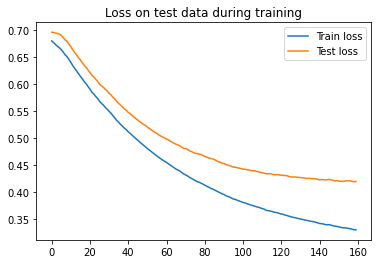

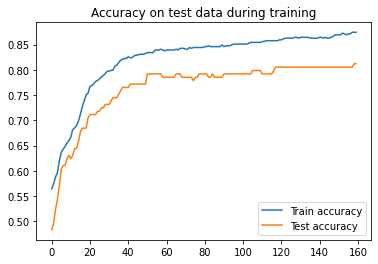

In [19]:
# Plot final results
plt.plot(eval_counter, train_losses)
plt.plot(eval_counter, test_losses)
plt.title("Loss on test data during training")
plt.legend(["Train loss", "Test loss"])
plt.show()

plt.plot(eval_counter, train_accuracies)
plt.plot(eval_counter, test_accuracies)
plt.title("Accuracy on test data during training")
plt.legend(["Train accuracy", "Test accuracy"])
plt.show()

In [20]:
# Print final results
print(f"\nNN performance")
print(f"Train loss: {train_losses[-1]}")
print(f"Test loss: {test_losses[-1]}")
print(f"Train accuracy: {train_accuracies[-1]}")
print(f"Test accuracy: {test_accuracies[-1]}")

print(f"\nRF performance")
print(f"Train accuracy: {train_accuracy_RF}")
print(f"Test accuracy: {test_accuracy_RF}")

print(f"\nBase performance")
print(f"Train loss: {nn.BCELoss()(torch.zeros(len(X_train)), y_train).detach().numpy()}")
print(f"Test loss: {nn.BCELoss()(torch.zeros(len(X_test)), y_test).detach().numpy()}")
print(f"Train accuracy: {accuracy(np.zeros(len(X_train)), y_train.numpy())}")
print(f"Test accuracy: {accuracy(np.zeros(len(X_test)), y_test.numpy())}")


NN performance
Train loss: 0.33073481917381287
Test loss: 0.41998907923698425
Train accuracy: 0.8743718592964824
Test accuracy: 0.8120805369127517

RF performance
Train accuracy: 0.8994974874371859
Test accuracy: 0.8187919463087249

Base performance
Train loss: 49.413734436035156
Test loss: 40.939598083496094
Train accuracy: 0.5058626465661642
Test accuracy: 0.5906040268456376


In [21]:
# Save loss/accuracy for each observation in order to calculate confidence interval later
np.savetxt(
    "train_losses_NN.csv",
    np.array(
        [
            nn.BCELoss()(output, target).detach().numpy()
            for output, target
            in zip(torch.squeeze(net(X_train)), y_train)
        ]
    ),
    delimiter=","
)

np.savetxt(
    "test_losses_NN.csv",
    np.array(
        [
            nn.BCELoss()(output, target).detach().numpy()
            for output, target
            in zip(torch.squeeze(net(X_test)), y_test)
        ]
    ),
    delimiter=","
)

np.savetxt(
    "train_accuracy_NN.csv",
    [1 if x[0] > 0.5 else 0 for x in net(X_train).detach().numpy()] == y_train.numpy(),
    delimiter=",",
    fmt="%d"
)

np.savetxt(
    "test_accuracy_NN.csv",
    [1 if x[0] > 0.5 else 0 for x in net(X_test).detach().numpy()] == y_test.numpy(),
    delimiter=",",
    fmt="%d"
)

np.savetxt(
    "train_accuracy_RF.csv",
    model.predict(X_train) == y_train.numpy(),
    delimiter=",",
    fmt="%d"
)

np.savetxt(
    "test_accuracy_RF.csv",
    model.predict(X_test) == y_test.numpy(),
    delimiter=",",
    fmt="%d"
)

np.savetxt(
    "train_loss_base.csv",
    np.array(
        [
            nn.BCELoss()(output, target).detach().numpy()
            for output, target
            in zip(torch.zeros(len(X_train)), y_train)
        ]
    ),
    delimiter=",",
    fmt="%d"
)

np.savetxt(
    "test_loss_base.csv",
    np.array(
        [
            nn.BCELoss()(output, target).detach().numpy()
            for output, target
            in zip(torch.zeros(len(X_test)), y_test)
        ]
    ),
    delimiter=",",
    fmt="%d"
)

np.savetxt(
    "train_accuracy_base.csv",
    np.zeros(len(X_train)) == y_train.numpy(),
    delimiter=",",
    fmt="%d"
)

np.savetxt(
    "test_accuracy_base.csv",
    np.zeros(len(X_test)) == y_test.numpy(),
    delimiter=",",
    fmt="%d"
)